In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df

,size,counting,bucket,radix256,heap,quick
0,100,0.001444,0.002525,0.000006,0.000010,0.000007
1,100,0.000269,0.000558,0.000006,0.000009,0.000006
2,100,0.000141,0.000530,0.000005,0.000008,0.000006
3,100,0.000141,0.000242,0.000006,0.000006,0.000005
4,100,0.000141,0.000242,0.000006,0.000006,0.000004
...,...,...,...,...,...,...
115,100000,0.001610,0.007331,0.002419,0.022793,0.019009
116,100000,0.001609,0.007573,0.002416,0.022697,0.019040
117,100000,0.001608,0.007243,0.002414,0.022635,0.019059
118,100000,0.001610,0.007385,0.002452,0.022802,0.019055


In [3]:
x = list(df["size"].unique())
by_size = [df.loc[df["size"] == t] for t in x]

y_q = [np.mean(x["quick"]) for x in by_size]
y_h = [np.mean(x["heap"]) for x in by_size]

y_c = [np.mean(x["counting"]) for x in by_size]
y_b = [np.mean(x["bucket"]) for x in by_size]
y_r = [np.mean(x["radix256"]) for x in by_size]


e_q = [np.std(x["quick"]) for x in by_size]
e_h = [np.std(x["heap"]) for x in by_size]

e_c = [np.std(x["counting"]) for x in by_size]
e_b = [np.std(x["bucket"]) for x in by_size]
e_r = [np.std(x["radix256"]) for x in by_size]


<ErrorbarContainer object of 3 artists>

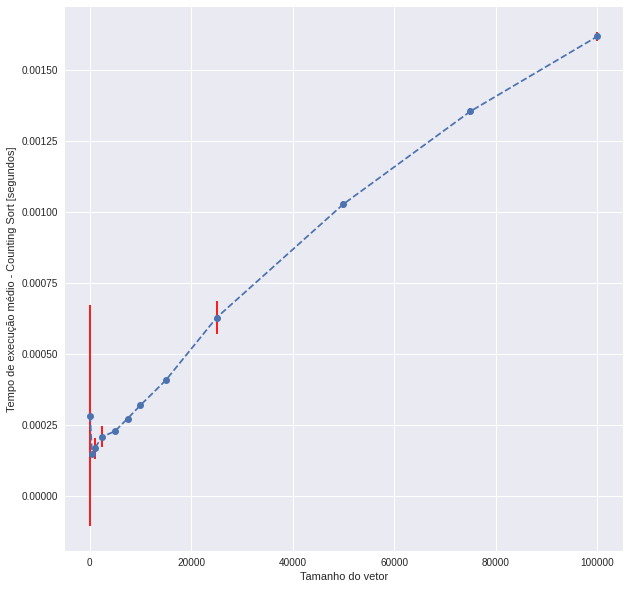

In [4]:
plt.style.use("seaborn")
plt.figure(figsize=[10, 10])
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo de execução médio - Counting Sort [segundos]')

plt.errorbar(x, y_c, yerr=e_c, fmt='o--', ecolor='r', capsize=3)

<ErrorbarContainer object of 3 artists>

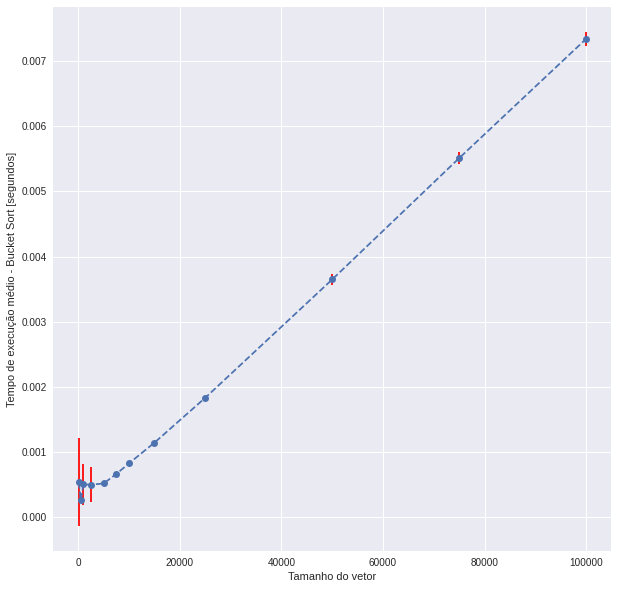

In [5]:
plt.figure(figsize=[10, 10])
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo de execução médio - Bucket Sort [segundos]')

plt.errorbar(x, y_b, yerr=e_b, fmt='o--', ecolor='r', capsize=3)

<ErrorbarContainer object of 3 artists>

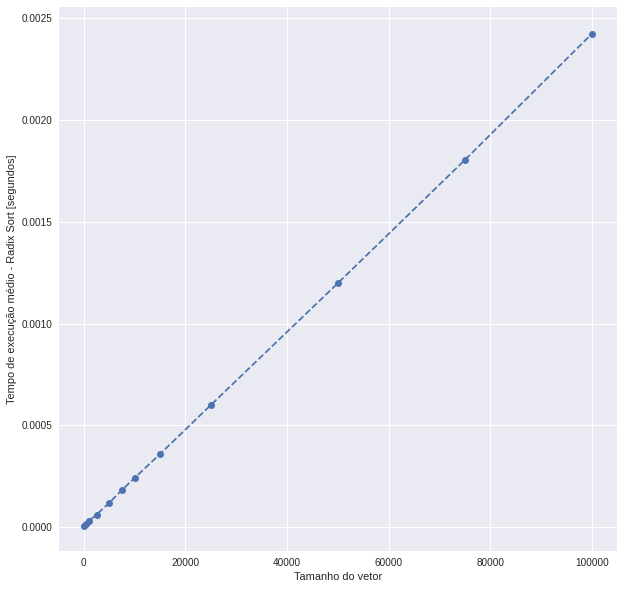

In [6]:
plt.figure(figsize=[10, 10])
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo de execução médio - Radix Sort [segundos]')

plt.errorbar(x, y_r, yerr=e_r, fmt='o--', ecolor='r', capsize=3)

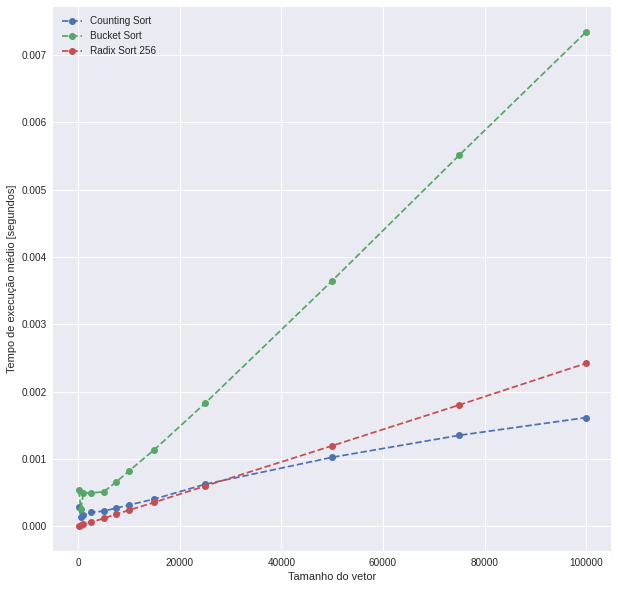

In [7]:
plt.figure(figsize=[10, 10])
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo de execução médio [segundos]')

plt.plot(x,y_c, 'o--', label='Counting Sort')
plt.plot(x,y_b, 'o--', label='Bucket Sort')
plt.plot(x,y_r, 'o--', label='Radix Sort 256')

plt.legend()

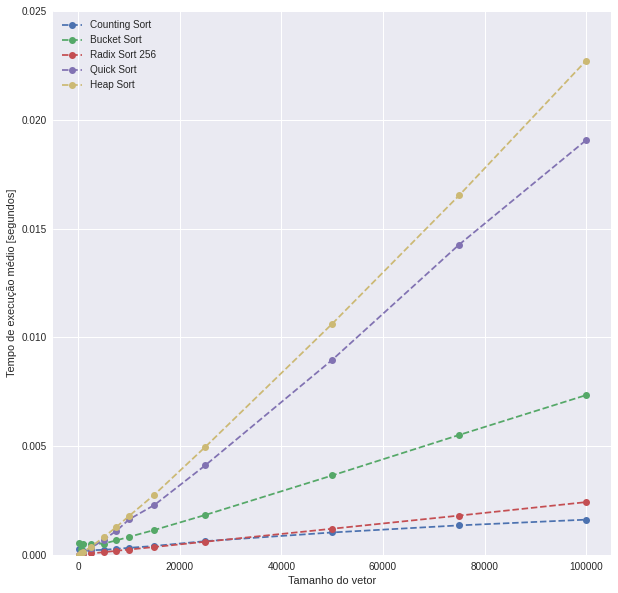

In [8]:
plt.figure(figsize=[10, 10])
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo de execução médio [segundos]')

plt.plot(x,y_c, 'o--', label='Counting Sort')
plt.plot(x,y_b, 'o--', label='Bucket Sort')
plt.plot(x,y_r, 'o--', label='Radix Sort 256')
plt.plot(x,y_q, 'o--', label='Quick Sort')
plt.plot(x,y_h, 'o--', label='Heap Sort')


ax = plt.gca()
ax.set_ylim([0, 0.025])
plt.legend()

In [9]:
dw = pd.read_csv("bw.csv")
dw

,case,counting,bucket,radix
0,b,0.000008,0.000033,0.000028
1,b,0.000008,0.000033,0.000027
2,b,0.000008,0.000054,0.000028
3,b,0.000008,0.000034,0.000041
4,b,0.000008,0.000060,0.000027
5,b,0.000007,0.000051,0.000027
6,b,0.000008,0.000032,0.000044
7,b,0.000029,0.000032,0.000027
8,b,0.000007,0.000031,0.000027
9,b,0.000007,0.000031,0.000027


In [10]:
x = list(dw["case"].unique())
by_type = [dw.loc[dw["case"] == t] for t in x]
y_c = [np.mean(x["counting"]) for x in by_type]
y_b = [np.mean(x["bucket"]) for x in by_type]
y_r = [np.mean(x["radix"]) for x in by_type]


e_c = [np.std(x["counting"]) for x in by_type]
e_b = [np.std(x["bucket"]) for x in by_type]
e_r = [np.std(x["radix"]) for x in by_type]

<BarContainer object of 2 artists>

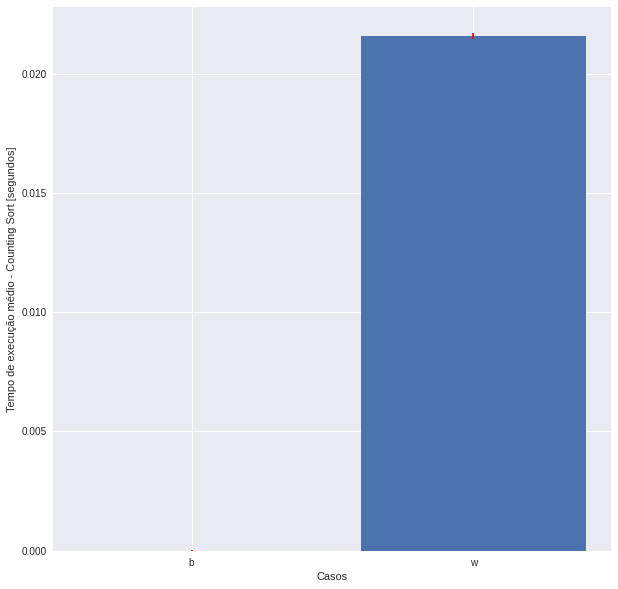

In [11]:
plt.figure(figsize=[10, 10])
plt.xlabel('Casos')
plt.ylabel('Tempo de execução médio - Counting Sort [segundos]')

plt.bar(x, y_c, yerr=e_c, ecolor='r')

<BarContainer object of 2 artists>

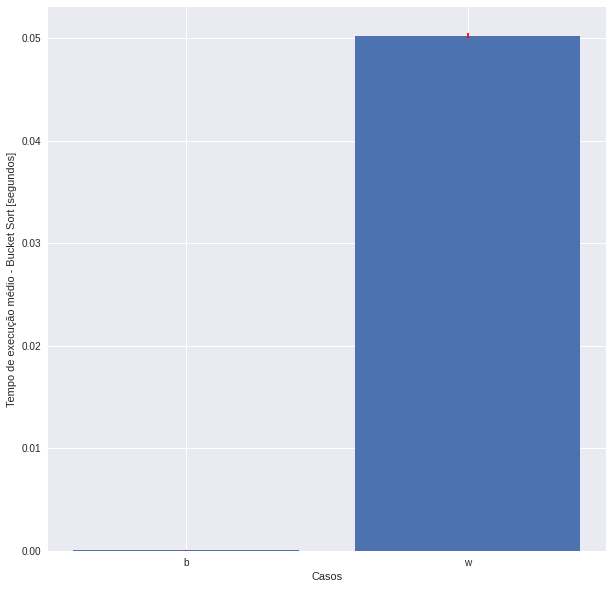

In [12]:
plt.figure(figsize=[10, 10])
plt.xlabel('Casos')
plt.ylabel('Tempo de execução médio - Bucket Sort [segundos]')

plt.bar(x, y_b, yerr=e_b, ecolor='r')

<BarContainer object of 2 artists>

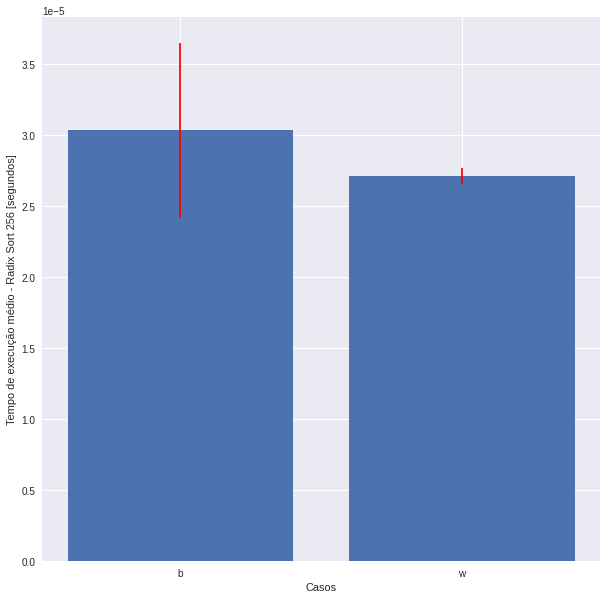

In [13]:
plt.figure(figsize=[10, 10])
plt.xlabel('Casos')
plt.ylabel('Tempo de execução médio - Radix Sort 256 [segundos]')

plt.bar(x, y_r, yerr=e_r, ecolor='r')